# Global Vector(GloVe)
GloVe (Global Vectors for Word Representation) is an unsupervised learning algorithm for obtaining vector representations for words. Unlike Word2Vec, which focuses on predicting the context of a word given its surrounding words (either using the CBOW or Skip-gram architectures), GloVe aims to directly learn the relationship between words based on their co-occurrence statistics in the corpus.

## How GloVe works:

Corpus: "The cat sat on the mat. The dog played in the garden."

#### Step 1 - Co-occurrence Matrix:
Consider a window size of 1. The co-occurrence matrix counts how often each word appears in the context of every other word.

For instance, "cat" and "sat" co-occur once, "dog" and "played" co-occur once, etc.

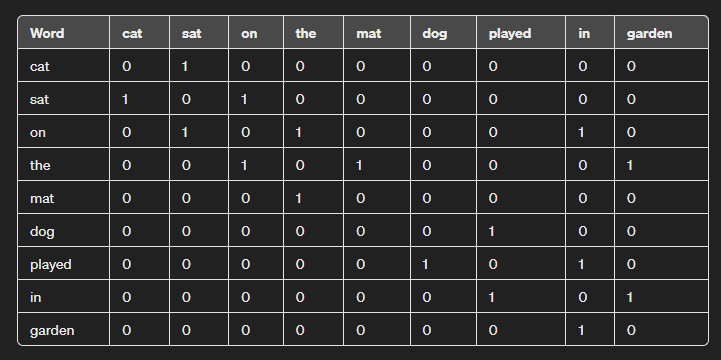

Calculations:

For example, the entry in the first row and second column represents the number of times "cat" co-occurs with "sat", which is 1.

Similarly, the entry in the second row and first column represents the number of times "sat" co-occurs with "cat", which is also 1.

Entries along the diagonal (e.g., "cat" with "cat") represent self-co-occurrences and are typically set to 0.

#### Step 2 - Training GloVe Model:
Let's assume we have 100-dimensional word vectors for each word in our vocabulary. For simplicity, let's consider the word vector for each word to be a vector of zeros initially.

The loss function in GloVe measures the difference between predicted co-occurrences and actual co-occurrences.

It aims to minimize this difference during training.
One commonly used loss function in GloVe is the mean squared error (MSE) loss.

Use optimization techniques such as gradient descent to adjust the word vectors in order to minimize the loss function.

During each iteration of training, we update the word vectors based on the gradients of the loss function with respect to the word vectors.

#### Step 3 - Word Vector Representation:

After training, each word has an associated vector representation.
For example, "cat" might have a vector [0.2, -0.5, 0.8] and "dog" might have [0.4, 0.3, -0.6].
These vectors capture semantic relationships between words based on their co-occurrence patterns in the corpus.

## Difference from Other Word Embedding Techniques:

Unlike Word2Vec, which is based on neural network architectures (CBOW and Skip-gram), GloVe is a count-based method that directly models the co-occurrence statistics of words.

GloVe typically requires less hyperparameter tuning compared to Word2Vec, making it easier to train.

GloVe tends to perform well on tasks that involve capturing global word relationships and are less sensitive to training data size compared to Word2Vec.

## Advantages:

Captures global word co-occurrence patterns effectively.

Produces meaningful word representations even for rare words.

Robust to noisy data and works well with large corpora.

## Disadvantages:

Requires significant computational resources and memory for training on large datasets.

Does not explicitly capture semantic relationships between words.

May struggle with capturing syntactic nuances compared to neural network-based approaches like Word2Vec.

## Applications:

Natural language processing tasks such as text classification, sentiment analysis, and machine translation.

Information retrieval systems for document similarity and relevance ranking.

Generating word embeddings for downstream machine learning models, such as neural networks and support vector machines.

In [1]:
!wget nlp.stanford.edu/data/glove.6B.zip

--2024-04-09 12:32:08--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-04-09 12:32:09--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-04-09 12:32:09--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [2]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [3]:
import gensim
from gensim.scripts.glove2word2vec import glove2word2vec

In [4]:
glove_input_file = 'glove.6B.300d.txt'
glove_output_file = 'word2vec.txt'
glove2word2vec(glove_input_file,glove_output_file)

<ipython-input-4-8604527923fd>:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file,glove_output_file)


(400000, 300)

In [5]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format(glove_output_file, binary=False)

In [6]:
model['king']

array([ 0.0033901, -0.34614  ,  0.28144  ,  0.48382  ,  0.59469  ,
        0.012965 ,  0.53982  ,  0.48233  ,  0.21463  , -1.0249   ,
       -0.34788  , -0.79001  , -0.15084  ,  0.61374  ,  0.042811 ,
        0.19323  ,  0.25462  ,  0.32528  ,  0.05698  ,  0.063253 ,
       -0.49439  ,  0.47337  , -0.16761  ,  0.045594 ,  0.30451  ,
       -0.35416  , -0.34583  , -0.20118  ,  0.25511  ,  0.091111 ,
        0.014651 , -0.017541 , -0.23854  ,  0.48215  , -0.9145   ,
       -0.36235  ,  0.34736  ,  0.028639 , -0.027065 , -0.036481 ,
       -0.067391 , -0.23452  , -0.13772  ,  0.33951  ,  0.13415  ,
       -0.1342   ,  0.47856  , -0.1842   ,  0.10705  , -0.45834  ,
       -0.36085  , -0.22595  ,  0.32881  , -0.13643  ,  0.23128  ,
        0.34269  ,  0.42344  ,  0.47057  ,  0.479    ,  0.074639 ,
        0.3344   ,  0.10714  , -0.13289  ,  0.58734  ,  0.38616  ,
       -0.52238  , -0.22028  , -0.072322 ,  0.32269  ,  0.44226  ,
       -0.037382 ,  0.18324  ,  0.058082 ,  0.26938  ,  0.3620

In [8]:
similar_words = model.most_similar('king')

In [9]:
for sim_word, score in similar_words:
    print(f"Similarity between 'king' and '{sim_word}': {score}")

Similarity between 'king' and 'queen': 0.6336469054222107
Similarity between 'king' and 'prince': 0.6196622848510742
Similarity between 'king' and 'monarch': 0.5899620652198792
Similarity between 'king' and 'kingdom': 0.5791266560554504
Similarity between 'king' and 'throne': 0.5606487989425659
Similarity between 'king' and 'ii': 0.5562329292297363
Similarity between 'king' and 'iii': 0.5503199100494385
Similarity between 'king' and 'crown': 0.5224862694740295
Similarity between 'king' and 'reign': 0.5217353701591492
Similarity between 'king' and 'kings': 0.5066401958465576
